##### tensorflow, keras official documentations

https://github.com/keras-team/keras-io/blob/master/examples/vision/image_classification_from_scratch.py

https://keras.io/examples/vision/image_classification_from_scratch/

https://www.tensorflow.org/api_docs/python/tf/image

 https://github.com/dphi-official/Deep_Learning_Bootcamp/blob/master/Assignment_2/Assignment2_Help_Notebook.ipynb

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
from PIL import UnidentifiedImageError
import glob
import os
from PIL import ImageFile 
import matplotlib.pyplot as plt 

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dropout,LSTM

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
x = tf.keras.preprocessing.image_dataset_from_directory(
    directory=r'E:\STUDY RESOURCES\DATA SCIENCE\P R O J E C T S\Datasets\257_ObjectCategories',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    #crop_to_aspect_ratio=True,
    ##**kwargs
)

Found 30607 files belonging to 257 classes.


In [5]:
print(x)

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>


In [7]:
class_names = x.class_names
print(class_names)

['001.ak47', '002.american-flag', '003.backpack', '004.baseball-bat', '005.baseball-glove', '006.basketball-hoop', '007.bat', '008.bathtub', '009.bear', '010.beer-mug', '011.billiards', '012.binoculars', '013.birdbath', '014.blimp', '015.bonsai-101', '016.boom-box', '017.bowling-ball', '018.bowling-pin', '019.boxing-glove', '020.brain-101', '021.breadmaker', '022.buddha-101', '023.bulldozer', '024.butterfly', '025.cactus', '026.cake', '027.calculator', '028.camel', '029.cannon', '030.canoe', '031.car-tire', '032.cartman', '033.cd', '034.centipede', '035.cereal-box', '036.chandelier-101', '037.chess-board', '038.chimp', '039.chopsticks', '040.cockroach', '041.coffee-mug', '042.coffin', '043.coin', '044.comet', '045.computer-keyboard', '046.computer-monitor', '047.computer-mouse', '048.conch', '049.cormorant', '050.covered-wagon', '051.cowboy-hat', '052.crab-101', '053.desk-globe', '054.diamond-ring', '055.dice', '056.dog', '057.dolphin-101', '058.doorknob', '059.drinking-straw', '060.du

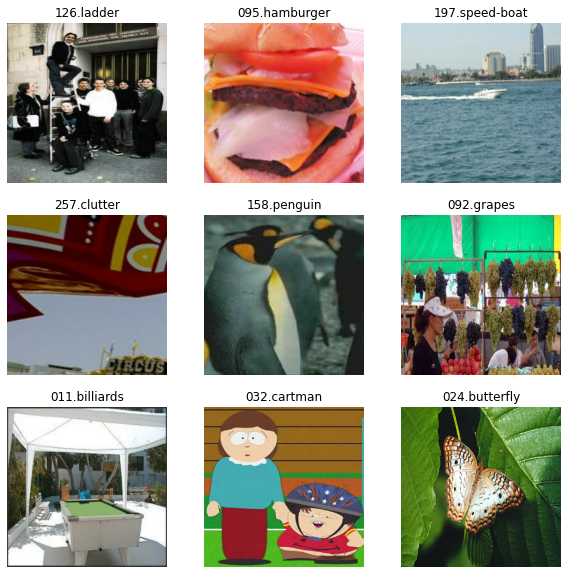

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in x.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=r'E:\STUDY RESOURCES\DATA SCIENCE\P R O J E C T S\Datasets\257_ObjectCategories',
    validation_split=0.2,
    subset="training",
    seed=1337,
    batch_size=32,
    image_size=(256, 256)
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
   directory=r'E:\STUDY RESOURCES\DATA SCIENCE\P R O J E C T S\Datasets\257_ObjectCategories',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    batch_size=32,
    image_size=(256, 256)
)



Found 30607 files belonging to 257 classes.
Using 24486 files for training.
Found 30607 files belonging to 257 classes.
Using 6121 files for validation.


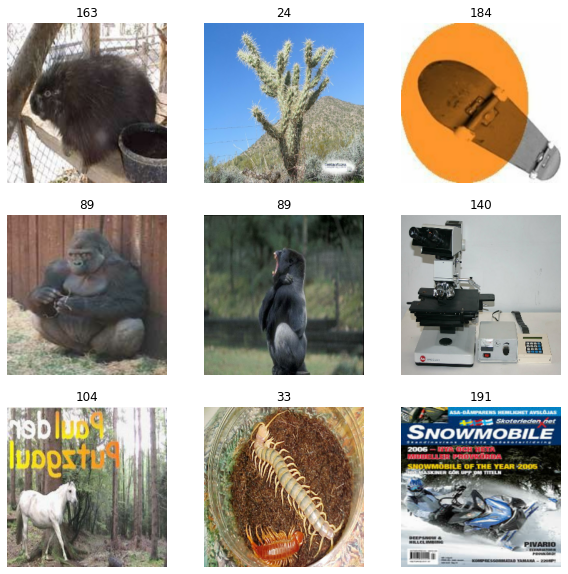

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(100):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [34]:
num_classes = 257
img_height,img_width=256,256
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [35]:

model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


C:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


766/766 [==============================] - 492s 641ms/step - loss: 5.0425 - accuracy: 0.0872 - val_loss: 4.6132 - val_accuracy: 0.1318
Epoch 2/10
766/766 [==============================] - 497s 649ms/step - loss: 4.2122 - accuracy: 0.1714 - val_loss: 4.2281 - val_accuracy: 0.1760
Epoch 3/10
766/766 [==============================] - 589s 768ms/step - loss: 3.5266 - accuracy: 0.2554 - val_loss: 4.3821 - val_accuracy: 0.1846
Epoch 4/10
766/766 [==============================] - 1156s 2s/step - loss: 2.7734 - accuracy: 0.3735 - val_loss: 4.8342 - val_accuracy: 0.1789
Epoch 5/10
766/766 [==============================] - 1163s 2s/step - loss: 1.9691 - accuracy: 0.5225 - val_loss: 6.0576 - val_accuracy: 0.1632
Epoch 6/10
766/766 [==============================] - 1098s 1s/step - loss: 1.3201 - accuracy: 0.6621 - val_loss: 7.3759 - val_accuracy: 0.1583
Epoch 7/10
766/766 [==============================] - 1172s 2s/step - loss: 0.9038 - accuracy: 0.7598 - val_loss: 8.9219 - val_accuracy: 0.15